# PA 1: Exploratory Analysis over Dataset_python

## Student Details

Student Name and ID: Racharla, Bharath Raj Varma (1001848518)

Student Name and ID: Krishna, Navneeth (1002050459)

Student Name and ID: Pullapolla, Shivani (1002038803)


 ## Assignment Details

In this assignment, you will explore, manipulate and play with the data.

You will prepare a report with the following outline for each one of the dataset. Look at the following Example.

1.	Introduction

2.	Retrieving the Data

3.	Glimpse of Data

4.	Check for missing data

5.	Data Exploration

6.  Include a paragraph describing the contribution made by each team member


You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Python, Weka and R. DO Task 1, Task 2, Task 3, Task 4 using Python, Weka, R.
 
**Out of the 3 datasets listed below:**

**1. Dataset_python should be solved using Python in Jupyter notebook only.**

**2. Dataset_Weka using WEKA**

**3. Dataset_R using R**


You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

# Dataset Details

In this assignment, you will work on dataset_python. The columns of the dataset are:

- age - age of the individual
- employment - Type of job
- fw - the number of people the census believes the entry represents
- education - Type of education
- years-education - the number of years of education
- marital-status - check relationship status
- job - Type of occupation
- bond - Relationship status
- race - origin of the individual
- gender - gender of the individual
- capital-gain - capital gain for the individual
- capital-loss -  capital loss for the individual
- hours-per-week - number of hours worked by the individual
- native-country - Country of origin
- income > 50K - range of the income of the corresponding individual

## Required Python Packages

In [67]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
from itertools import chain

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'dataset_python.csv' must be in the same folder as this file.

In [68]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('dataset_python.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_data.head()

,age,employment,fw,education,years-education,marital-status,job,bond,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income > 50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,Yes
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,No
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,Yes
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,No
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,No


# Task 1: Statistical Exploratory Data Analysis (17.5 points)
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [69]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

# 5 points
#Task 1-a: Print the details of the df_data data frame (information such as dimensionality, names of features (note that there's no target variable here), statistical details, etc)
print("Task 1-a: Print the details of the df_data data frame (information such as dimensionality, names of features (note that there's no target variable here), statistical details, etc) \n")
print(f"Dimensionality of the dataframe: {df_data.shape}")

print(f"Column names of the dataframe: {df_data.columns.tolist()}")

print(df_data.describe())

# 5 points
#Task 1-b: Print names of all the countries used in the dataset with the number of their occurences

print("Task 1-b: Print names of all the countries used in the dataset with the number of their occurences \n")
country_counts = df_data['native-country'].value_counts()
print(country_counts)

# 5 points
#Task 1-c: Print the number of duplicated rows in the dataset and remove the duplicated rows
print("Task 1-c: Print the number of duplicated rows in the dataset and remove the duplicated rows \n")
print(f"Number of duplicated rows: {df_data.duplicated().sum()}")

df_data.drop_duplicates(inplace=True)
# 5 points
#Task 1-d: Some of the entries in the columns are undefined. Determine which columns contain these undefined entries and print the count of these undefined entries for each column respectively.
print("Task 1-d: Some of the entries in the columns are undefined. Determine which columns contain these undefined entries and print the count of these undefined entries for each column respectively. \n")
columns_with_undefined_entries = df_data.columns[df_data.isna().any()].tolist()
print(f"Columns with undefined entries: {columns_with_undefined_entries}")

undefined_counts = df_data[columns_with_undefined_entries].isna().sum()
print(undefined_counts)


Task 1-a: Print the details of the df_data data frame (information such as dimensionality, names of features (note that there's no target variable here), statistical details, etc) 

Dimensionality of the dataframe: (44003, 15)
Column names of the dataframe: ['age', 'employment', 'fw', 'education', 'years-education', 'marital-status', 'job', 'bond', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income > 50K']
                age            fw  years-education  capital-gain  \
count  44003.000000  4.400300e+04     44003.000000  44003.000000   
mean      38.620617  1.896754e+05        10.074904   1093.042929   
std       13.735749  1.058612e+05         2.575028   7566.990327   
min       17.000000  1.349200e+04         1.000000      0.000000   
25%       28.000000  1.174960e+05         9.000000      0.000000   
50%       37.000000  1.781000e+05        10.000000      0.000000   
75%       48.000000  2.376580e+05        12.000000      0.000000   
max

# Task 2: Aggregation & Filtering & Rank (30 points)
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking.

In [70]:
# 5 points
# Task 2-a: Find out how many (count) Masters have Exec-managerial job
print("Task 2-a: Find out how many (count) Masters have Exec-managerial job \n")
masters_exec_count = len(df_data[(df_data['education'] == 'Masters') & (df_data['job'] == 'Exec-managerial')])

print(f"Number of individuals with Masters degree and Exec-managerial job: {masters_exec_count}")

# 10 points
# Task 2-b: Retrieve and print the records of Americans (United States) with private employment who have been putting in more than 30 hours a week of work.
print("Task 2-b: Retrieve and print the records of Americans (United States) with private employment who have been putting in more than 30 hours a week of work. \n")
us_private = df_data[(df_data['native-country'] == 'United-States') & (df_data['employment'] == 'Private') & (df_data['hours-per-week'] > 30)]
print(us_private)

# 5 points
# Task 2-c: Print the count of each type of employment for United States
print("Task 2-c: Print the count of each type of employment for United States \n")
us_data = df_data[df_data['native-country'] == 'United-States']

employment_counts = us_data.groupby('employment')['employment'].count()

print(employment_counts)

# 10 points
# Task 2-d: Fetch and print the records of people having doctoral degrees and are divorced. 
print("Task 2-d: Fetch and print the records of people having doctoral degrees and are divorced. \n")
doc_divorced = df_data[(df_data['education'] == 'Doctorate') & (df_data['marital-status'] == 'Divorced')]
print(doc_divorced)


Task 2-a: Find out how many (count) Masters have Exec-managerial job 

Number of individuals with Masters degree and Exec-managerial job: 705
Task 2-b: Retrieve and print the records of Americans (United States) with private employment who have been putting in more than 30 hours a week of work. 

       age employment      fw     education  years-education  \
0       67    Private  366425     Doctorate               16   
2       31    Private  174201     Bachelors               13   
6       70    Private  216390           9th                5   
8       28    Private   74784       HS-grad                9   
9       28    Private  118089       HS-grad                9   
...    ...        ...     ...           ...              ...   
43952   52    Private   68982     Bachelors               13   
43953   19    Private  116562       HS-grad                9   
43954   30    Private  197947  Some-college               10   
43955   46    Private   97883     Bachelors               13  

# Task 3: Visualization (30 points)
You will carry out a number of visualization tasks to develop some intuition about the data. Exploration relies heavily on visualization. For plotting, you can use either Matplotlib or Seaborn. It's possible that the default figures produced by Matplotlib might look a bit dull. So, if you want better figures, you might want to try Seaborn. Seaborn features a wide range of styles.

Task 3-a: Display the countplot of race for each of the genders 



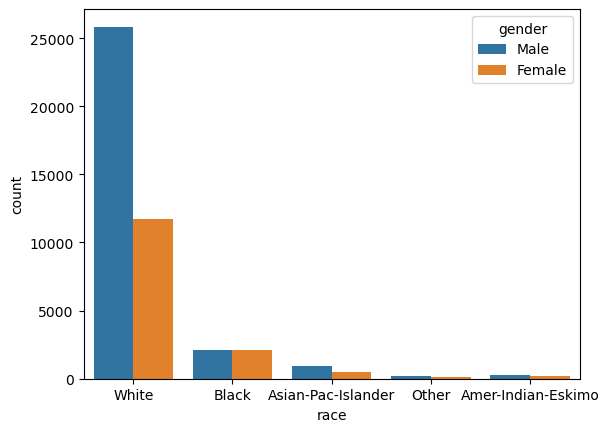

Task 3-b: Display a pie chart that represents native country and display percentages in legend respectively 



<function matplotlib.pyplot.show(close=None, block=None)>

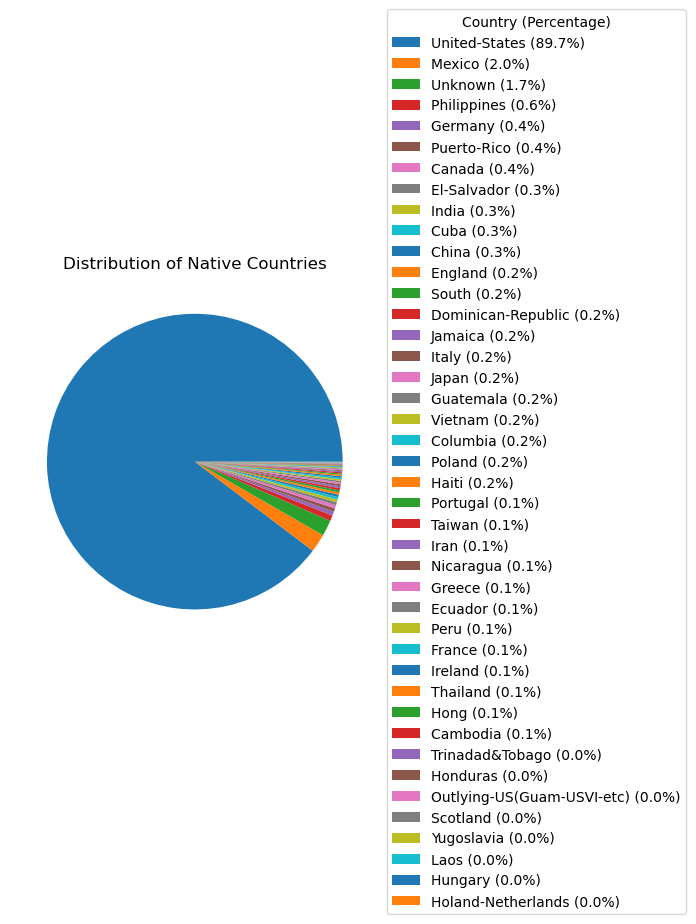

In [71]:
# 10 points
# Task 3-a: Display the countplot of race for each of the genders (in a single plot)
print("Task 3-a: Display the countplot of race for each of the genders \n")
sns.countplot(x='race', hue='gender', data=df_data)
plt.show()

# 20 points
# Task 3-b: Display a pie chart that represents native country and display percentages in legend respectively

print("Task 3-b: Display a pie chart that represents native country and display percentages in legend respectively \n")
# Calculate the percentages for each country
country_percents = 100 * country_counts / country_counts.sum()

# Create a pie chart of the counts
plt.pie(country_counts)

# Add a title
plt.title('Distribution of Native Countries')

# Add a legend with percentages and country names
legend_labels = [f'{country} ({percent:.1f}%)' for country, percent in zip(country_counts.index, country_percents)]
plt.legend(title='Country (Percentage)', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), labels=legend_labels)

# Show the plot
plt.show





# Task 4: Insights from the data (20 points)
Find out 'interesting' information from the dataset. Give two insights and Create a visualization for each of the insights. Explain in a few lines your reasoning. 

Your work's uniqueness and quality will be taken into account when evaluating your work (having a meaningful result and an aesthetic visualization). 

Insight_1


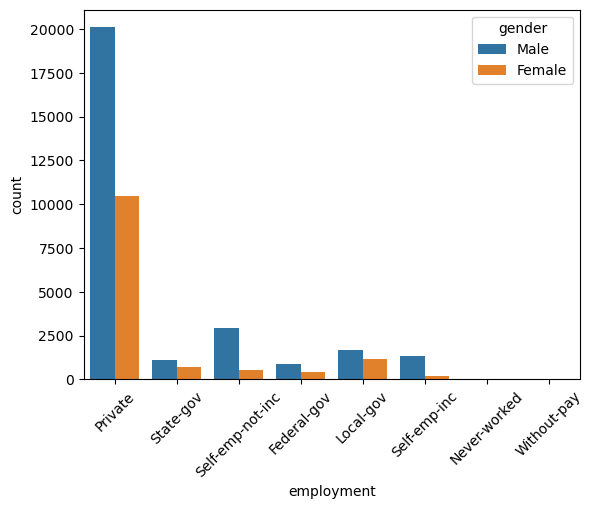

In [72]:
# Code and explanation for Task4

#Insight_1
print('Insight_1')
sns.countplot(x='employment', hue='gender', data=df_data)
plt.xticks(rotation=45)
plt.show()

# Insight_1
We can see from the bar plot that there are certain occupations that are more common among men or women. For example, more men are in the every occupation compared to women. This indicates that there is some gender bias in the distribution of occupations.

Insight_2


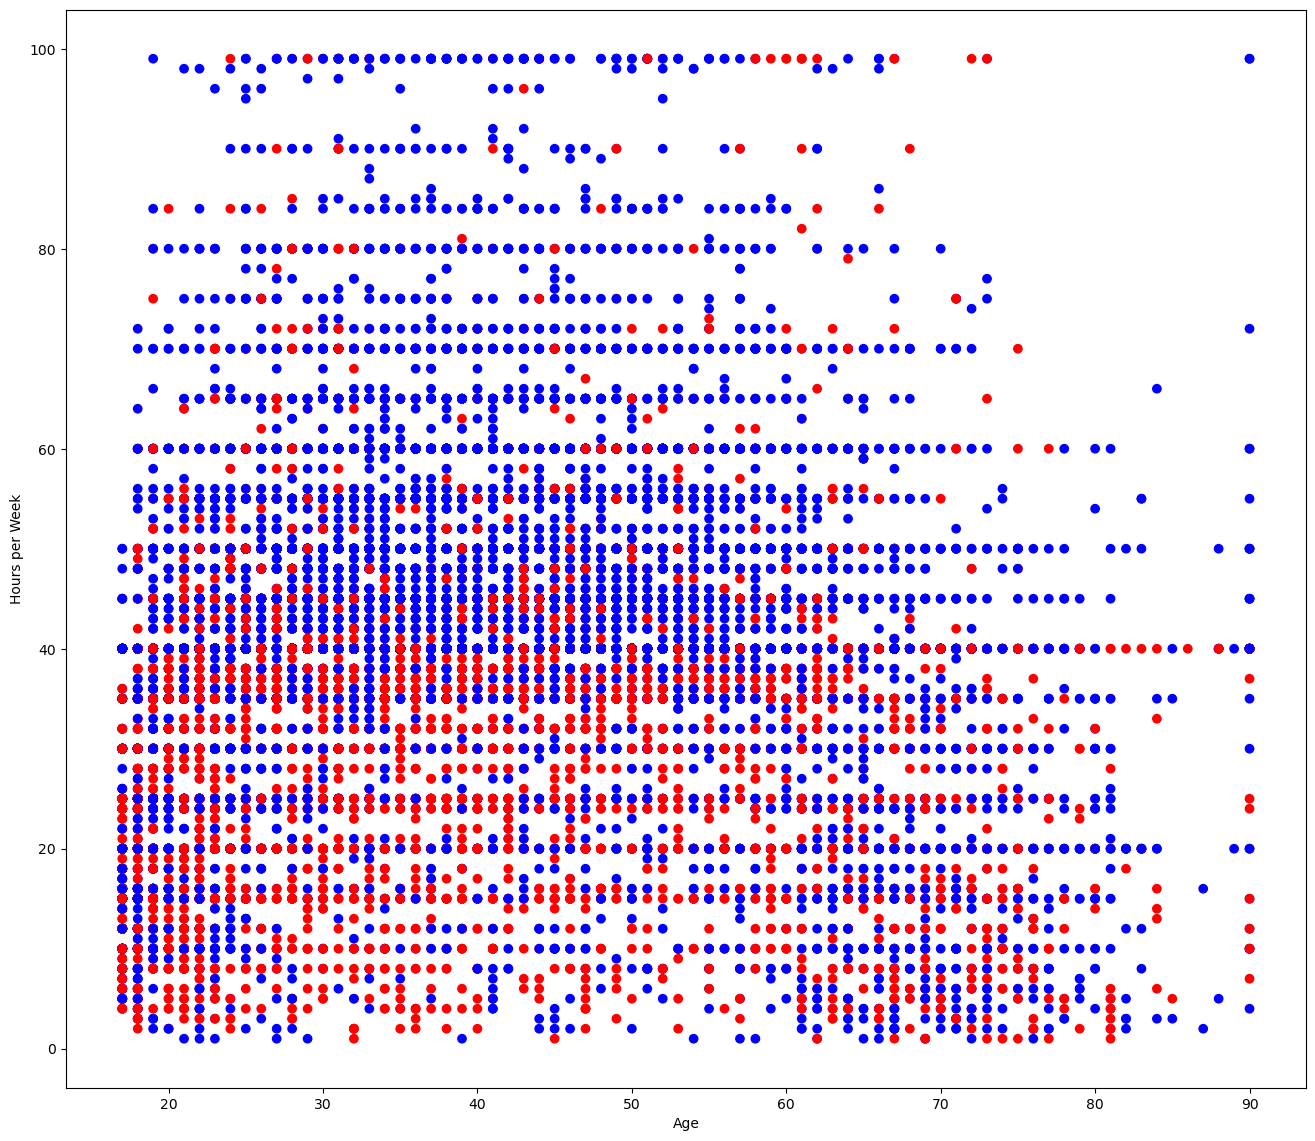

In [73]:
#Insight_2
print('Insight_2')
plt.figure(figsize=(16, 14))
plt.scatter(df_data['age'], df_data['hours-per-week'], c=df_data['gender'].map({'Male': 'blue', 'Female': 'red'}))
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()

# Insight_2

We can see from the scatter plot that there is a general trend of older people working fewer hours per week, and younger people working more hours per week. We can also see that there are more men working longer hours per week than women. However, there is a lot of overlap between the two genders, indicating that gender is not the only factor that determines the number of hours worked per week.

# Contribution

Navneeth contributed to this project by completing the Task 2, where in Task 2 Aggregation, Filtering and Ranking of the dataset was conducted. In this task, the dataset is queried for different insights as per the questions. The insight is displayed in the standard output.

Bharath contributed to this project by completing the Task 1 and Task 4, which was statistical exploratory data analysis and data cleaning. This steps involved understanding the different ways how to remove unwanted data from the dataset and create a clean data set. His work also involved printing dimensions of the cleaned data and the summary of the dataset. Task 4 involved getting Insights from the data in which two custom plots were created with its own query into the data. One of them is a scatter plot and the other one is a count plot. Insights were derived from the data and plots were generated to confirm the insights. And overala project was under control of Bharath.

Shivani contributed to this project by working on the Task 3 which is Visualization. In this task, she generated two plots as per the question guidelines, one a count plot and the other one is a pie chart with legends showing how the pie chart is divided.

# References

https://www.w3schools.com/python/pandas/default.asp

https://www.simplilearn.com/tutorials/python-tutorial/data-visualization-in-python#:~:text=The%20process%20of%20finding%20trends,%2C%20Seaborn%2C%20Plotly%2C%20etc.

https://towardsdatascience.com/aggregation-transform-filter-how-and-when-to-use-them-31ed7eb88d2e